<a href="https://colab.research.google.com/github/anamilanezi/google-data-analytics/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚲 Analysis goals:

* Mean of ride_length
* Max ride_length
* Min ride_lenght
* Mode of day of week
* Replace weekday names for numbers
* Average ride_length for members and casual riders
* Average ride_length by day of week
* Number of rides for users by day_of_week

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing all csv files and concatenating into a single dataframe

In [ ]:
# Import Libraries
import glob
import seaborn as sns
import pandas as pd
import datetime as datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [ ]:
# Get CSV files list from a folder
path = '/content/drive/MyDrive/Colab Notebooks/Google Capstone Project/data/raw_data'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df = pd.concat(df_list, ignore_index=True)

## Cheking for Null Values

In [ ]:
big_df.count()

ride_id               5900385
rideable_type         5900385
started_at            5900385
ended_at              5900385
start_station_name    5064367
start_station_id      5064370
end_station_name      5008282
end_station_id        5008282
start_lat             5900385
start_lng             5900385
end_lat               5895011
end_lng               5895011
member_casual         5900385
dtype: int64

In [ ]:
columns = list(big_df.columns)

for column in columns:
  total_nan = big_df[column].isna().sum()
  print(f"[{column}] has {total_nan} NaN values")


[ride_id] has 0 NaN values
[rideable_type] has 0 NaN values
[started_at] has 0 NaN values
[ended_at] has 0 NaN values
[start_station_name] has 836018 NaN values
[start_station_id] has 836015 NaN values
[end_station_name] has 892103 NaN values
[end_station_id] has 892103 NaN values
[start_lat] has 0 NaN values
[start_lng] has 0 NaN values
[end_lat] has 5374 NaN values
[end_lng] has 5374 NaN values
[member_casual] has 0 NaN values


Since the total of NaN values for the coluns `'start_station_name'`, `'start_station_id'`, `'end_station_name'` and `end_station_id'` almost reach one million, I opted to continue using these records for the analysis. Since for the most part there is latitude and longitude for both start and end points, these values should give us enough information, and the records with NaN values for this columns will be deleted.

In [ ]:
df = big_df[['ride_id', 'rideable_type', 'started_at', 'ended_at', 'member_casual']]

In [ ]:
df = df.dropna()

In [ ]:
df.count()

ride_id          5900385
rideable_type    5900385
started_at       5900385
ended_at         5900385
member_casual    5900385
dtype: int64

In [ ]:
columns = list(df.columns)

for column in columns:
  total_nan = df[column].isna().sum()
  print(f"[{column}] has {total_nan} NaN values")

[ride_id] has 0 NaN values
[rideable_type] has 0 NaN values
[started_at] has 0 NaN values
[ended_at] has 0 NaN values
[member_casual] has 0 NaN values


## Convert date column from string to datetime

In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
print(df.dtypes)

ride_id                  object
rideable_type            object
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual            object
dtype: object


## Calculate ride length and get day of week each ride started

In [ ]:
df['day_of_week'] = df['started_at'].dt.day_name()

In [ ]:
df['ride_length'] = df['ended_at'] - df['started_at']

In [ ]:
# Adding a new column with time in minutes
df['ride_length_minutes'] = (df['ride_length']/timedelta(minutes=1)).round(decimals = 2)

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length,ride_length_minutes
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,casual,Friday,0 days 00:35:22,35.37
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,casual,Wednesday,0 days 00:18:27,18.45
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,member,Sunday,0 days 00:17:50,17.83
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,member,Thursday,0 days 00:15:02,15.03
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,casual,Wednesday,0 days 00:19:03,19.05


## Getting statistical values for the ride length column

In [ ]:
df[['ride_length']].describe()

,ride_length
count,5900385
mean,0 days 00:20:16.942832713
std,0 days 02:35:13.345907040
min,-1 days +21:42:35
25%,0 days 00:06:17
50%,0 days 00:11:10
75%,0 days 00:20:12
max,34 days 02:27:09


This summary shows us that there is unusual records, not only for rides with more than one month in length, but also with negative values which is  impossible. First I will exclude all negative values.

In [ ]:
df = df.query('ride_length_minutes > 0')

In [ ]:
df.query('ride_length_minutes > 1440')

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length,ride_length_minutes
2615,0E932D1FF23D3B18,docked_bike,2021-07-02 04:39:34,2021-07-04 07:44:03,casual,Friday,2 days 03:04:29,3064.48
3885,3534500A658C53B0,docked_bike,2021-07-24 21:08:50,2021-07-28 02:12:27,casual,Saturday,3 days 05:03:37,4623.62
6965,6C08A6E9D8CA13B3,classic_bike,2021-07-03 01:06:42,2021-07-04 02:06:36,casual,Saturday,1 days 00:59:54,1499.90
8035,D5AF7115146CBAF8,classic_bike,2021-07-05 12:47:27,2021-07-06 13:47:20,casual,Monday,1 days 00:59:53,1499.88
8328,70CC9BE878F80268,classic_bike,2021-07-06 02:35:19,2021-07-07 03:35:13,casual,Tuesday,1 days 00:59:54,1499.90
...,...,...,...,...,...,...,...,...
5886786,F4EAB98F4DD26581,docked_bike,2022-06-28 04:49:29,2022-07-01 04:54:03,casual,Tuesday,3 days 00:04:34,4324.57
5886788,A8120081E3A91F03,classic_bike,2022-06-02 17:36:30,2022-06-03 18:36:24,member,Thursday,1 days 00:59:54,1499.90
5886806,D5F0401AB215354D,docked_bike,2022-06-17 14:36:05,2022-06-18 15:36:08,casual,Friday,1 days 01:00:03,1500.05
5886959,E3A85FBE4884FAC8,classic_bike,2022-06-22 17:10:17,2022-06-23 18:09:54,member,Wednesday,1 days 00:59:37,1499.62


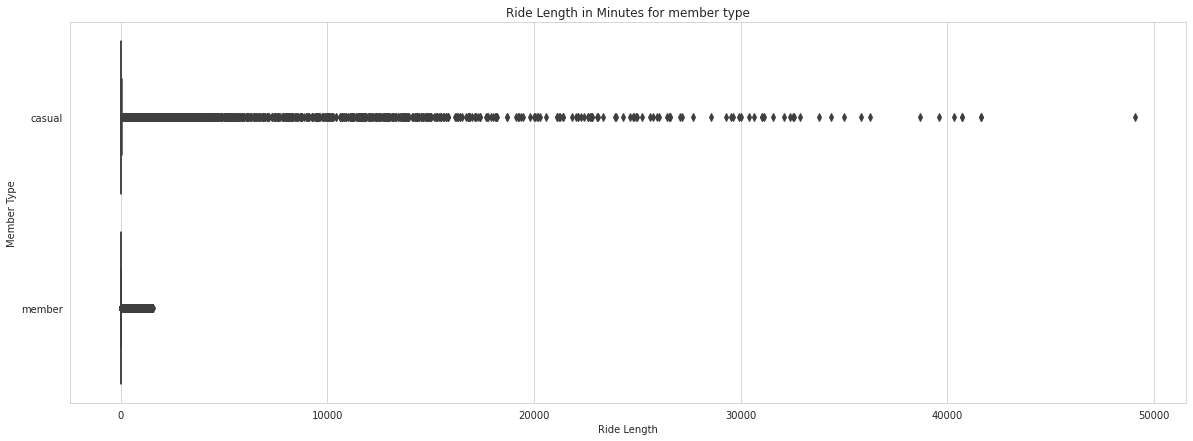

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=df["ride_length_minutes"], y=df["member_casual"])
  grafico.set(title="Ride Length in Minutes for member type", xlabel="Ride Length", ylabel="Member Type");
  grafico.figure.set_size_inches(w=20, h=7)

Not only mostly of the outliers are casual, they also goes way beyond the outliers from members. Casual users can purchase single-ride or full-day passes, so using this information I will also dismiss rides that surpass 24 hours (1440 minutes) from further analysis

In [ ]:
df = df.query('ride_length_minutes < 1440')

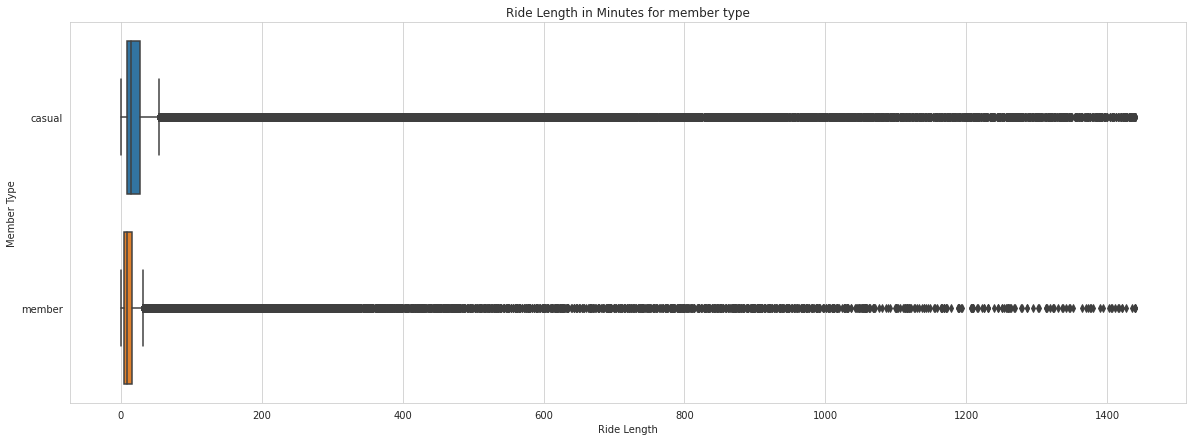

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=df["ride_length_minutes"], y=df["member_casual"])
  grafico.set(title="Ride Length in Minutes for member type", xlabel="Ride Length", ylabel="Member Type");
  grafico.figure.set_size_inches(w=20, h=7)

Although there is a great number of long rides, since it is allowed for a user to have a full day pass, this means we shouldn't exclude them from our analysis, and the median might be a better measure to describe the ride length.

# Average ride length and other statistical measures for members/casual riders

In [ ]:
grouped_df = df[['ride_length_minutes', 'member_casual']].groupby('member_casual')
q1, q3 = grouped_df.quantile(0.25), grouped_df.quantile(0.75)
iqr = q3 - q1
iqr

,ride_length_minutes
member_casual,
casual,18.53
member,10.47


In [ ]:
grouped_member_casual = df[['ride_length_minutes', 'member_casual']].groupby('member_casual').agg(['count', 'sum', 'mean', 'median', 'std', 'max', 'min', pd.Series.mode])


In [ ]:
user_statistics = pd.merge(left=grouped_member_casual, right=iqr, on='member_casual', how="inner")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  """Entry point for launching an IPython kernel.


In [ ]:
user_statistics = user_statistics.rename(lambda x: x[1], axis=1)
user_statistics

,count,sum,mean,median,std,max,min,mode,i
member_casual,,,,,,,,,
casual,2553735,62913375.68,24.635828,14.82,43.428342,1439.92,0.02,8.42,18.53
member,3341286,42543098.08,12.732552,9.07,19.382995,1439.95,0.02,4.33,10.47


# Replace day of week by number and add new columns

In [ ]:
import calendar
days = {name: i + 1 for i, name in enumerate(calendar.day_name)}
print(days)

{'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}


In [ ]:
df['day_of_week'] = df['day_of_week'].apply(lambda day: days[day] if day == day else day)

### Get mode of day of week

For casual members, saturday is the most frequent day, and for members, it's wednesday

In [ ]:
grouped_day_of_week = df[['day_of_week', 'member_casual']].groupby('member_casual').agg(['count', 'sum', 'mean', 'median', 'std', 'max', 'min', pd.Series.mode])


In [ ]:
grouped_day_of_week


day_of_week                                                  
                    count       sum      mean median       std max min mode
member_casual                                                              
casual            2553735  11295245  4.423029    5.0  2.014631   7   1    6
member            3341286  12959285  3.878532    4.0  1.941477   7   1    4

## Adding a column to specify months

In [ ]:
df['month'] = df['started_at'].apply(lambda x: x.month)

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length,ride_length_minutes,month
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,casual,5,0 days 00:35:22,35.37,7
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,casual,3,0 days 00:18:27,18.45,7
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,member,7,0 days 00:17:50,17.83,7
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,member,4,0 days 00:15:02,15.03,7
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,casual,3,0 days 00:19:03,19.05,7


In [ ]:
months_order = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]

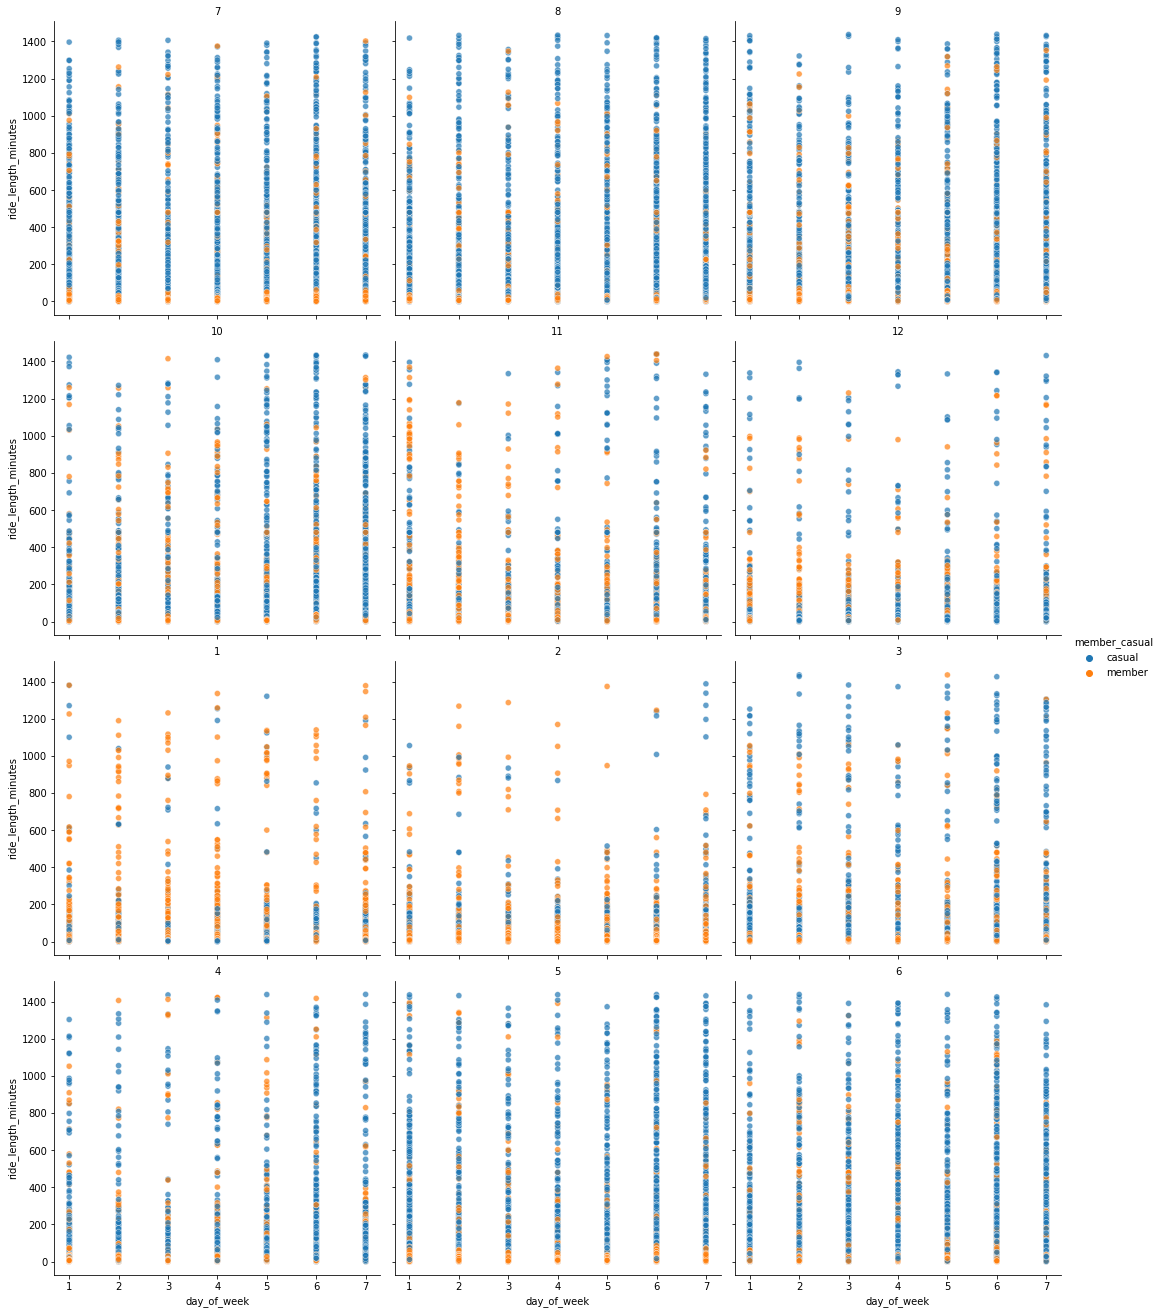

In [ ]:
grafico = sns.relplot(data=df, y='ride_length_minutes', x='day_of_week', hue="member_casual", col="month", col_order=months_order,col_wrap=3, alpha=0.7)
grafico.fig.subplots_adjust(top=.9)
grafico.set_titles(col_template="{col_name}")

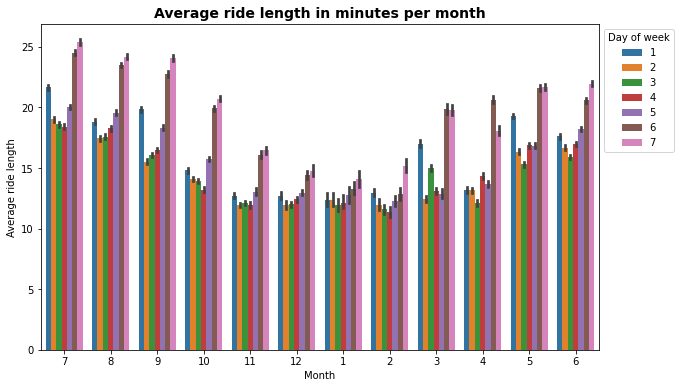

In [ ]:
g = sns.barplot(data=df, y='ride_length_minutes', x='month', order=months_order, hue="day_of_week")
g.set_title("Average ride length in minutes per month", fontsize=14, fontweight="bold");
g.set(xlabel="Month", ylabel="Average ride length")
g.figure.set_size_inches(10,6)
plt.legend(title="Day of week", loc = 2, bbox_to_anchor = (1,1))
#plt.rcParams['figure.figsize']=(14,7)


In [ ]:
# Creates a list of df for each month (is this really necessary? :P)
months = [df.query(f'month == {i}') for i in range(1, 13)]

Since the data used is from July 2021 - June 2022, I'm creating a list to specify the cronological order for the plots.

In [ ]:
# Create a dictionary for months:

month_names = {(i): name for i, name in enumerate(calendar.month_name) if i != 0}
print(month_names)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


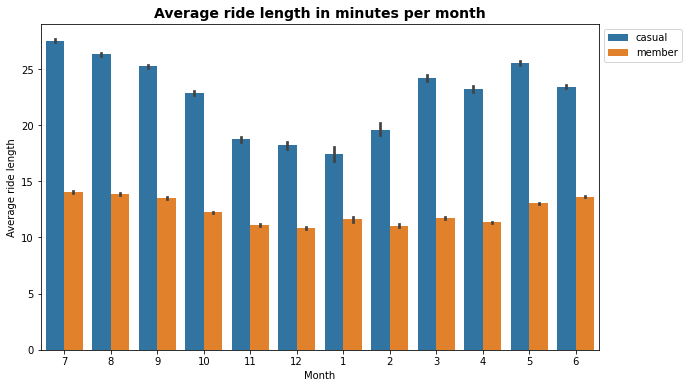

In [ ]:
graph = sns.barplot(data=df, x=df["month"], y=df["ride_length_minutes"], order=months_order, hue=df["member_casual"])
graph.set_title("Average ride length in minutes per month", fontsize=14, fontweight="bold");
graph.set(xlabel="Month", ylabel="Average ride length")
graph.figure.set_size_inches(10,6)
plt.legend(loc = 2, bbox_to_anchor = (1,1))

In [ ]:
colors_member_casual = {"member": "#FBB040", "casual": "#506F86" }

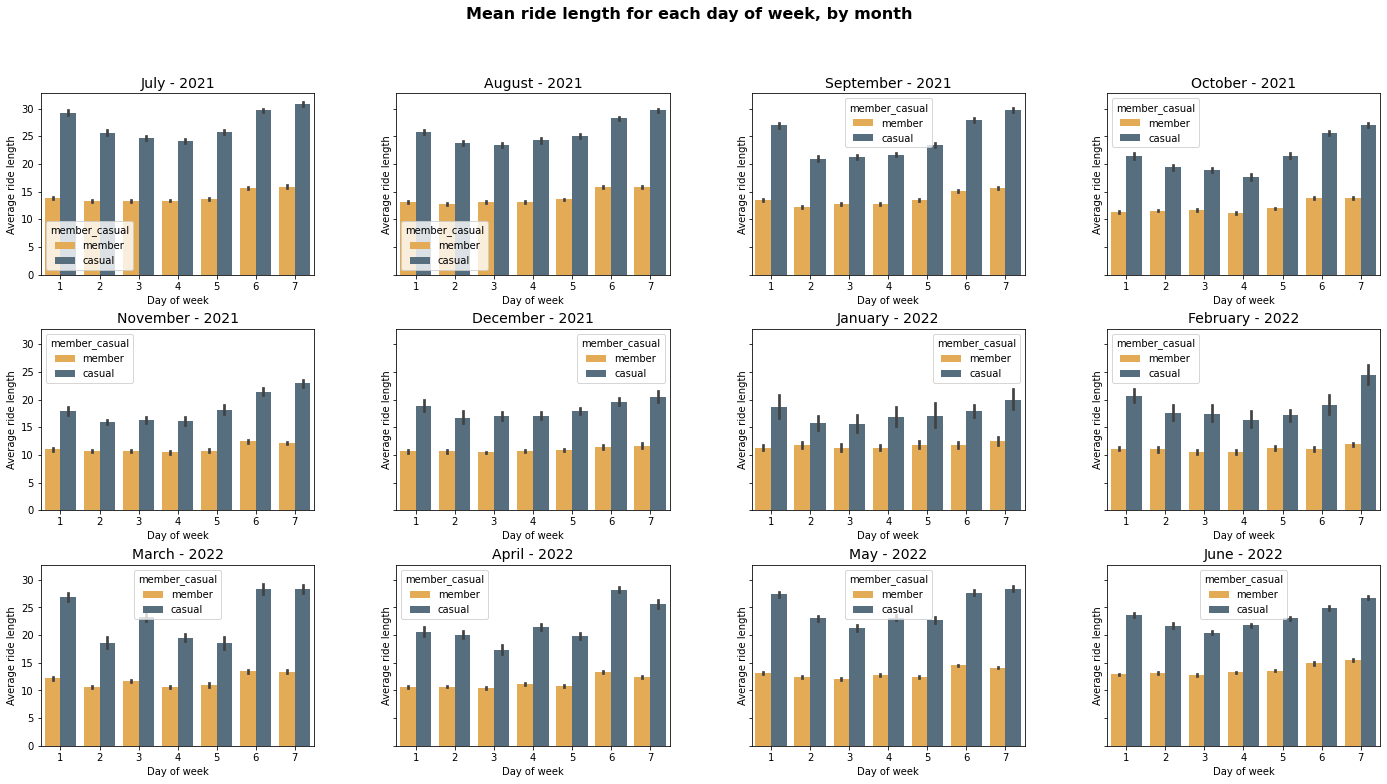

In [ ]:
labels = "Member", "Casual"

fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
fig.suptitle(t='Mean ride length for each day of week, by month', fontsize=16, fontweight="bold")
fig.subplots_adjust(hspace=0.3, wspace=0.3)
# fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

m = 6
year = 2021

for i in range(3):
  for j in range(4):
    g = sns.barplot(ax=axes[i, j], x=months[m]['day_of_week'], y=months[m]['ride_length_minutes'], hue=months[m]['member_casual'], hue_order=["member", "casual"], palette=colors_member_casual)
    g.set(xlabel="Day of week", ylabel="Average ride length")
    axes[i, j].set_title(f"{month_names[m+1]} - {year}", fontsize=14)
    m += 1
    if m == 12:
      m = 0
      year = 2022

In [ ]:
day_of_week = df[['day_of_week', 'ride_length', 'member_casual']].groupby(['day_of_week', 'member_casual'], as_index=False).agg('count')

,day_of_week,member_casual,count
0,1,casual,303449
1,1,member,468924
2,2,casual,277317
3,2,member,518125
4,3,casual,285031
5,3,member,516447
6,4,casual,324607
7,4,member,525808
8,5,casual,362502
9,5,member,469147


In [ ]:
day_of_week.rename(columns={"ride_length": "count"}, inplace=True)

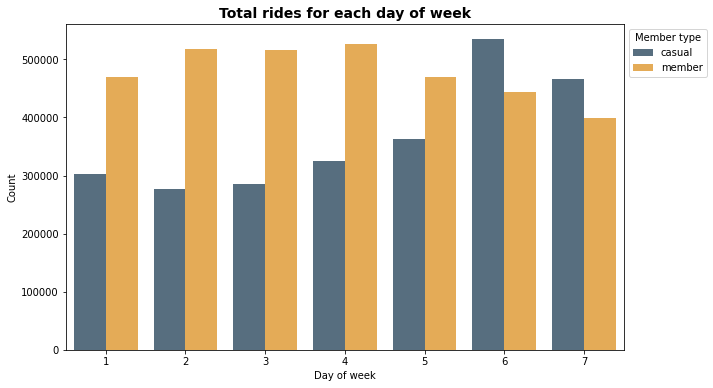

In [ ]:
days_count = sns.barplot(data=day_of_week, x='day_of_week', y='count', hue='member_casual', palette=colors_member_casual)
days_count.set_title("Total rides for each day of week", fontsize=14, fontweight="bold");
days_count.set(xlabel="Day of week", ylabel="Count")
days_count.figure.set_size_inches(10,6)
plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))

In [ ]:
grouped_months= df[['month', 'ride_length', 'member_casual']].groupby(['month', 'member_casual'], as_index=False).agg('count')
grouped_months.rename(columns={"ride_length": "count"}, inplace=True)

In [ ]:
grouped_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          24 non-null     int64 
 1   member_casual  24 non-null     object
 2   count          24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


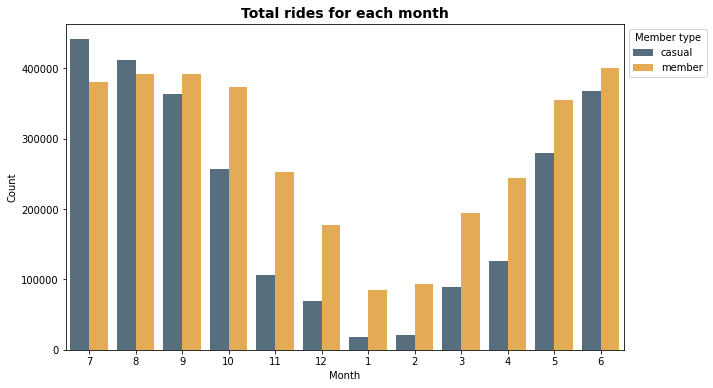

In [ ]:
months_count = sns.barplot(data=grouped_months, x='month', y='count', hue='member_casual', order=months_order, palette=colors_member_casual)
months_count.set_title("Total rides for each month", fontsize=14, fontweight="bold");
months_count.set(xlabel="Month", ylabel="Count")
months_count.figure.set_size_inches(10,6)
plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))

In [ ]:
grouped_months_mean= df[['month', 'ride_length_minutes', 'member_casual']].groupby(['month', 'member_casual'], as_index=False).agg('mean')
grouped_months_mean

,month,member_casual,ride_length_minutes
0,1,casual,17.428069
1,1,member,11.615183
2,2,casual,19.579223
3,2,member,11.026867
4,3,casual,24.213971
5,3,member,11.691015
6,4,casual,23.238360
7,4,member,11.335486
8,5,casual,25.530760
9,5,member,13.048955


Text(0.5, 1.0, 'Ride length')

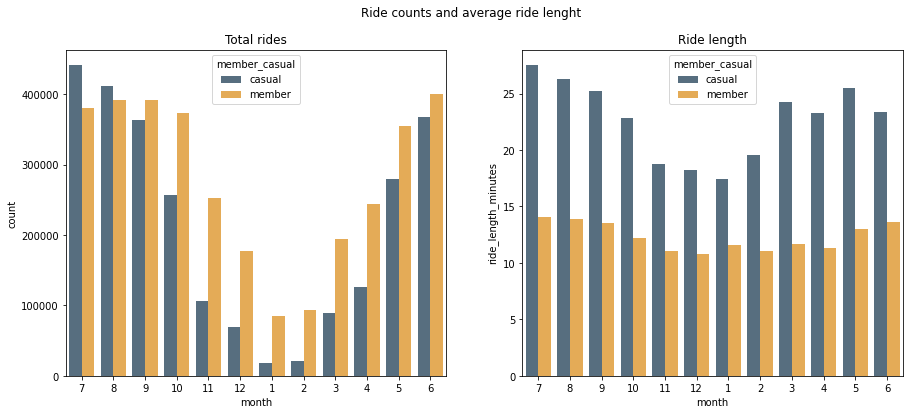

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Ride counts and average ride lenght')
#plt.figlegend(lines, labels, loc = 'lower center', ncol=5, labelspacing=0.)

m = 6
year = 2021

sns.barplot(ax=axes[0], data=grouped_months, x='month', y='count', hue='member_casual', order=months_order, palette=colors_member_casual)
axes[0].set_title("Total rides")


sns.barplot(ax=axes[1], data=grouped_months_mean, x='month', y='ride_length_minutes', hue='member_casual', order=months_order, palette=colors_member_casual)
axes[1].set_title("Ride length")

In [ ]:
month_day_of_week = df[['month', 'day_of_week', 'ride_length', 'member_casual']].groupby(['month', 'day_of_week', 'member_casual'], as_index=False).agg('count')
month_day_of_week.rename(columns={"ride_length": "count"}, inplace=True)

In [ ]:
month_day_of_week

,month,day_of_week,member_casual,count
0,1,1,casual,2421
1,1,1,member,13372
2,1,2,casual,2387
3,1,2,member,13751
4,1,3,casual,2375
...,...,...,...,...
163,12,5,member,29480
164,12,6,casual,11064
165,12,6,member,19064
166,12,7,casual,8417


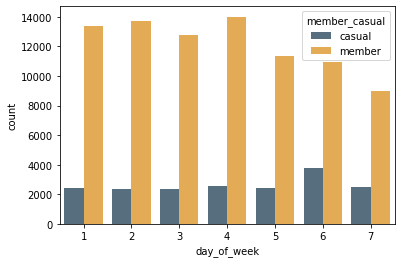

In [ ]:
jan = month_day_of_week.query('month == 1')
sns.barplot(data=jan, x='day_of_week', y='count', hue='member_casual', palette=colors_member_casual)

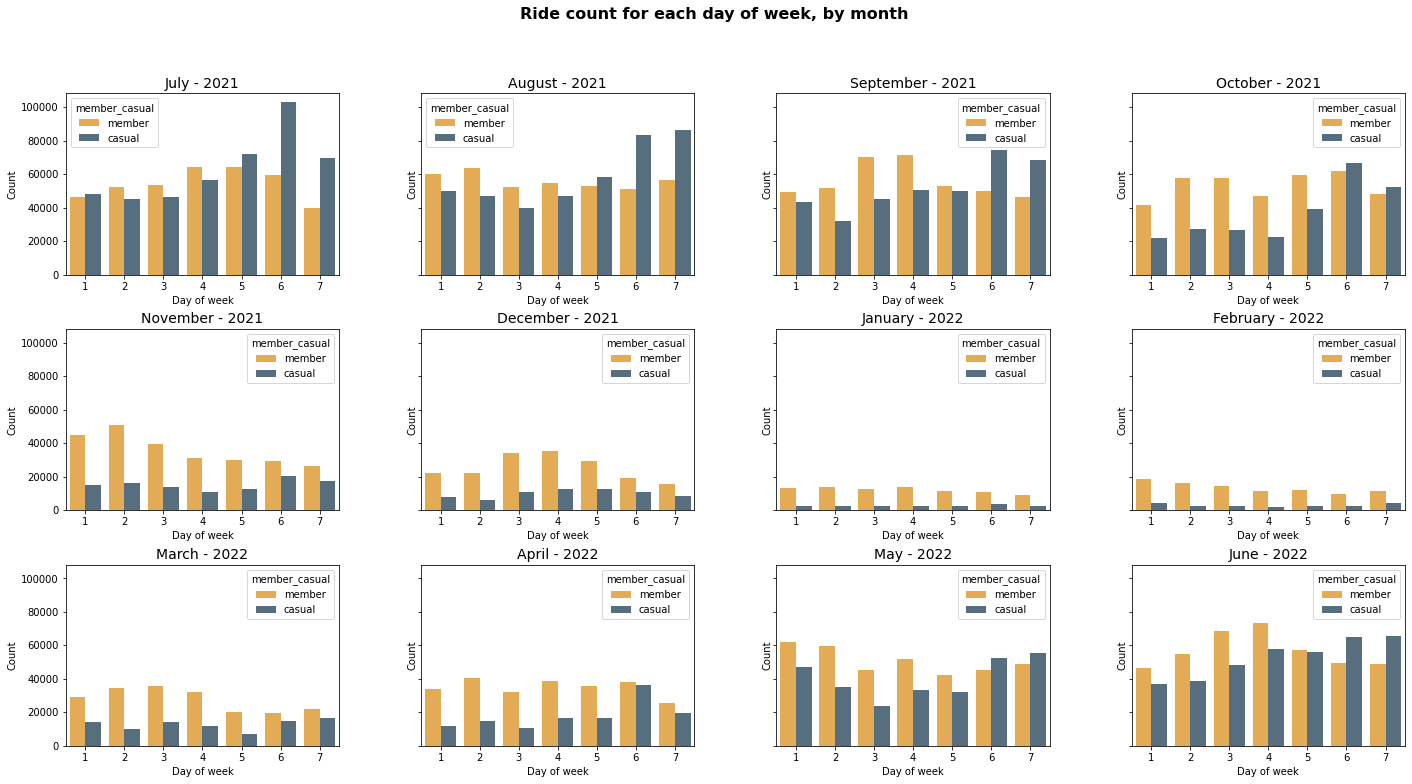

In [ ]:

fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
fig.suptitle(t='Ride count for each day of week, by month', fontsize=16, fontweight="bold")
fig.subplots_adjust(hspace=0.3, wspace=0.3)
# fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

m = 7
year = 2021

for i in range(3):
  for j in range(4):
    month_df = month_day_of_week.query(f'month == {m}')
    gf = sns.barplot(ax=axes[i, j], data=month_df, x='day_of_week', y='count', hue='member_casual', hue_order=["member", "casual"], palette=colors_member_casual)
    gf.set(xlabel="Day of week", ylabel="Count")
    axes[i, j].set_title(f"{month_names[m]} - {year}", fontsize=14)
    m += 1
    if m == 13:
      m = 1
      year = 2022

In [ ]:
grouped_months_type= df[['month', 'rideable_type', 'member_casual', 'ride_length_minutes']].groupby(['month', 'rideable_type', 'member_casual'], as_index=False).agg('count')
grouped_months_type.rename(columns={"ride_length_minutes": "count"}, inplace=True)